In [21]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
X = pd.read_csv("data/processed/marketing_campaign_final.csv")
X = X.drop(columns='ID')

In [93]:
X.shape

(2029, 10)

### Pour trouver les bon paramètres

#### k-distance plot

1. Fixer `min_samples`
Règle empirique :
$$ \text{min\_samples} \geq \text{dim} + 1 $$

Donc, pour un dataset de 10 colonnes → essayer min_samples = 10, puis ajuster
Augmenter un peu si bruit important

2. Trouver le meilleur `eps` avec un `k-distance` `plot`

- Chercher l'“épaule” (le coude) dans la courbe.

- La valeur de `eps` est souvent celle où la courbe commence à monter fortement.

📌 C’est le même principe que l’“elbow method” pour le K-means.



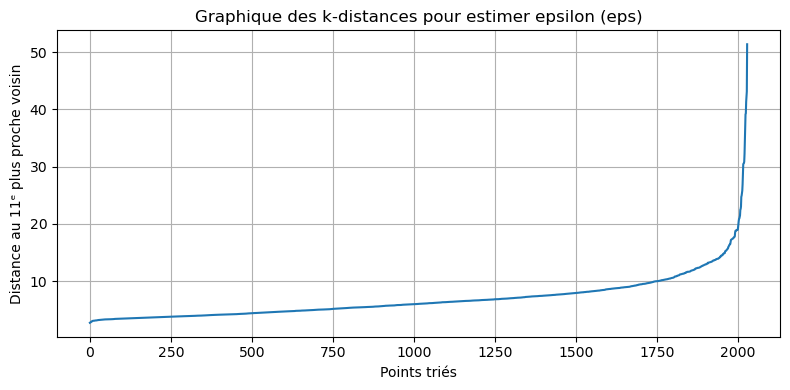

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


min_samples = 11
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# On prend la distance au k-ième plus proche voisin
k_distances = np.sort(distances[:, -1])  # la colonne -1 = la plus grande distance pour chaque point

# Tracé du k-distance plot
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points triés")
plt.ylabel(f"Distance au {min_samples}ᵉ plus proche voisin")
plt.title("Graphique des k-distances pour estimer epsilon (eps)")
plt.grid(True)
plt.tight_layout()



### Modélisation

-1 correspond aux outliers

In [117]:
EPS = 10
MinSAMPLES = 11

- `.fit()`, les labels sont stockés dans l’attribut `.labels_`

- `.fit_predict(X)` fait la même chose que `.fit(X)` et retourne directement les labels (`model.labels_`)

In [118]:

model = DBSCAN(eps=EPS, min_samples=MinSAMPLES)
labels = model.fit_predict(X)

X['cluster'] = labels
# Label de cluser pour chaque points
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Nombre de clusters trouvés : {n_clusters}")

Nombre de clusters trouvés : 4


Palette de couleur pour les clusters

In [122]:
# Statistiques descriptives par cluster
cluster_stats = X.groupby('cluster').mean().T
display(cluster_stats)
# Pour voir la répartition des effectifs par cluster
print(X['cluster'].value_counts())

cluster,-1,0,1,2,3
PC1,24.726785,-2.151753,43.537298,-12.325839,59.482910
PC2,-0.949924,0.404891,3.470413,-10.667864,-2.405501
PC3,-6.932084,0.867752,-9.295418,-6.318625,-11.025035
Age,-0.055334,0.020319,-0.293923,-0.300268,-0.526715
Income,0.770052,-0.057279,0.948675,-0.438645,1.258195
Total_Spending,0.726089,-0.066158,1.774977,-0.569745,2.530559
Has_Children,0.382812,0.749724,0.157895,0.819672,0.000000
Customer_Seniority,0.047442,-0.000905,-0.259606,0.047442,-0.217736
clusters,5.117188,1.372376,-1.000000,20.639344,-1.000000


cluster
 0    1810
-1     128
 2      61
 1      19
 3      11
Name: count, dtype: int64


### Visualisation
#### Affichage 2 D

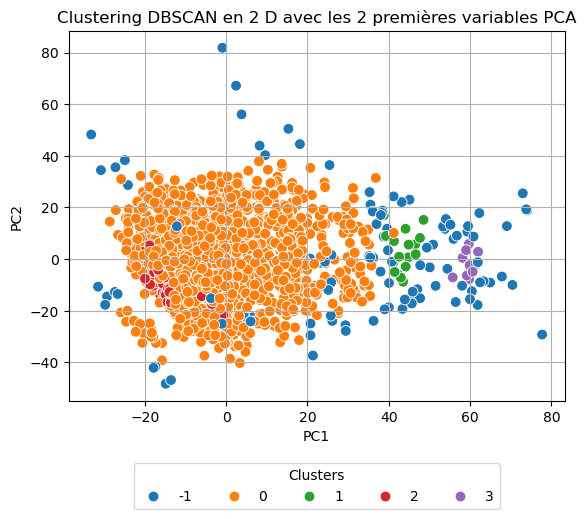

In [119]:
sns.scatterplot(
    data=X,
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title("Clustering DBSCAN en 2 D avec les 2 premières variables PCA")
plt.grid(True)
plt.legend(
    title="Clusters",
    bbox_to_anchor=(0.5,-0.15),
    loc='upper center',
    ncol=5,
    frameon=True
)

#### Affichage 3 D

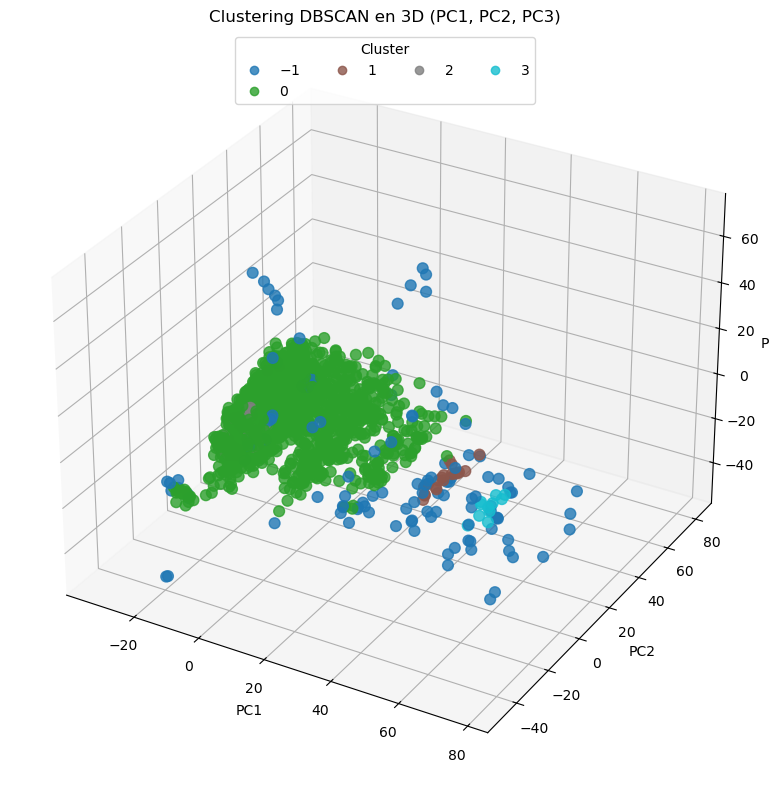

In [120]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D avec couleur selon cluster
scatter = ax.scatter(
    X['PC1'], X['PC2'], X['PC3'],
    c=X['cluster'],  # coloration par cluster
    cmap='tab10',
    s=60,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clustering DBSCAN en 3D (PC1, PC2, PC3)")

# Création de la légende
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Cluster", loc='upper center', ncol=4)

plt.tight_layout()

In [121]:
import plotly.express as px

fig = px.scatter_3d(
    X, x='PC1', y='PC2', z='PC3',
    color='cluster',
    title="Clustering DBSCAN en 3D",
    symbol='cluster'
)
fig.show()
